In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import pandas as pd

URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
df = pd.read_csv(URL)

# Display the first 5 rows
df.head(5)


,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


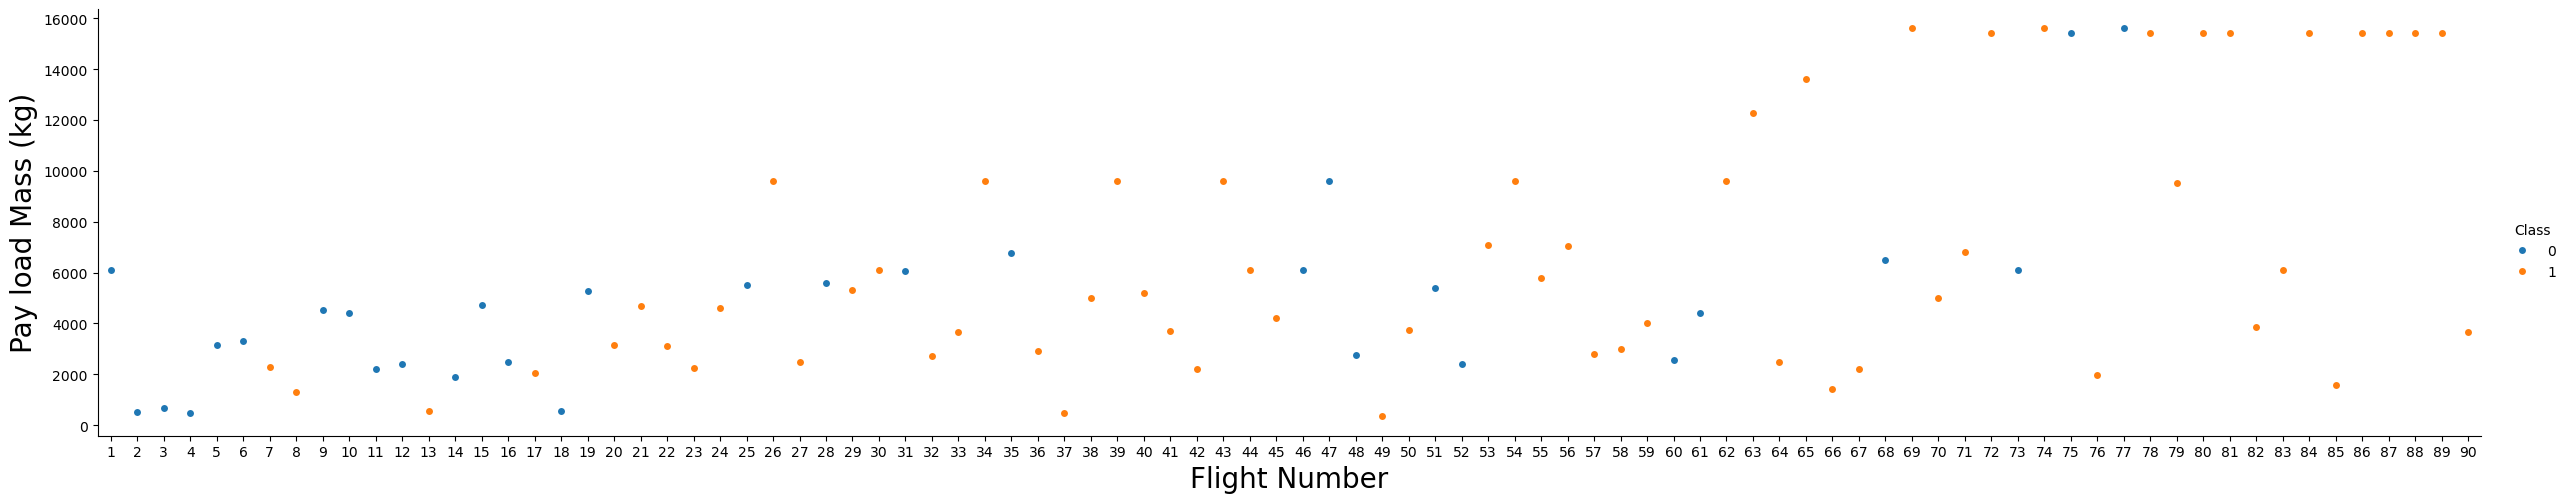

In [5]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

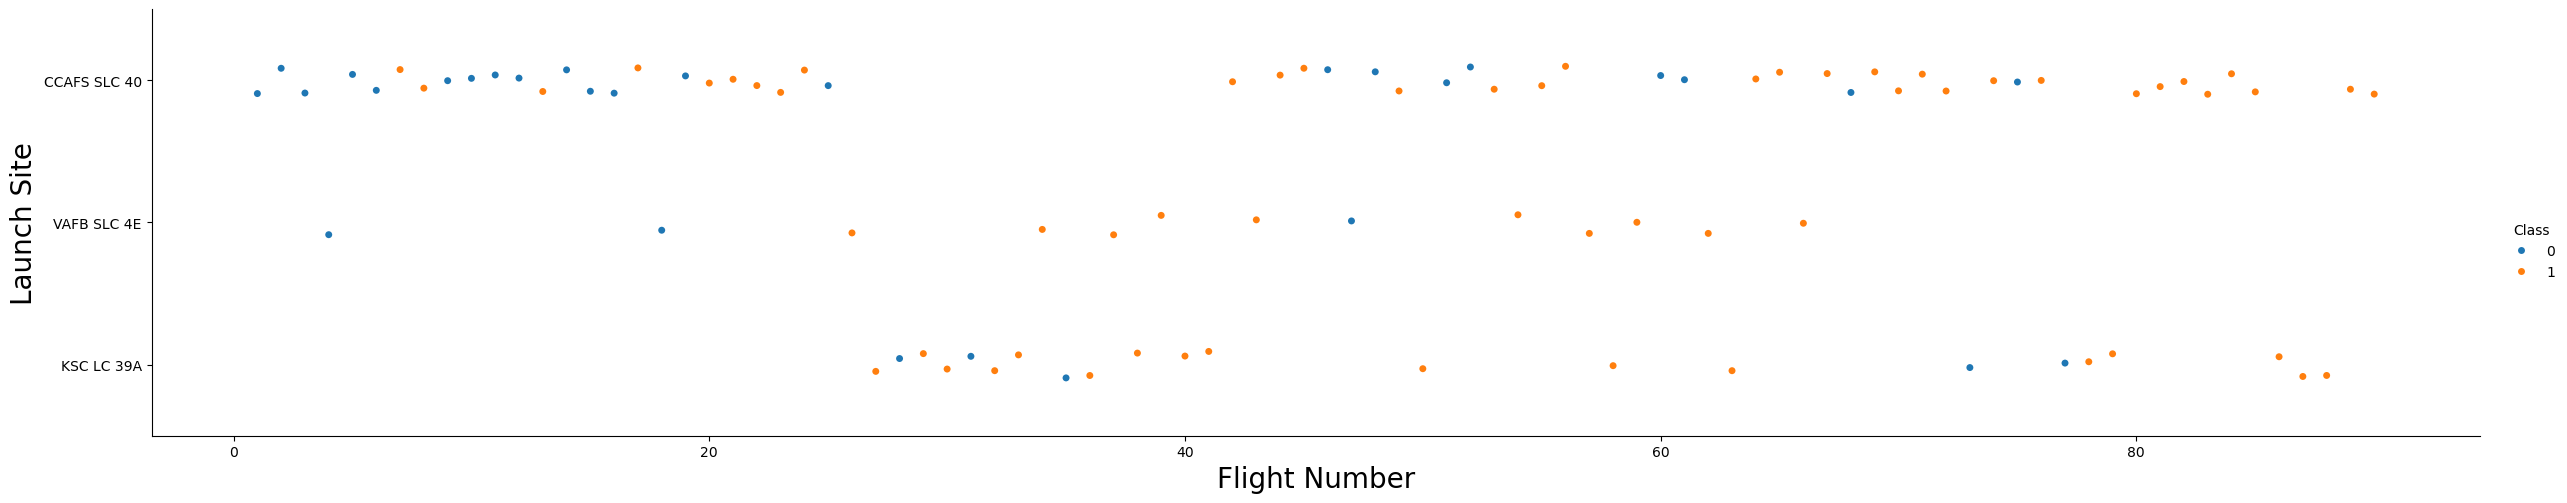

In [6]:
# Plot a scatter point chart with x axis to be Flight Number and y axis to be the launch site, and hue to be the class value

import matplotlib.pyplot as plt
import seaborn as sns

# Create the scatter‐type categorical plot
g = sns.catplot(
    data=df,
    x="FlightNumber",
    y="LaunchSite",
    hue="Class",
    kind="strip",       # strip plot (scatter) for categorical axes
    aspect=5,           # make the plot wide
    height=5
)

# Axis labels
plt.xlabel("Flight Number", fontsize=20)
plt.ylabel("Launch Site", fontsize=20)

plt.show()



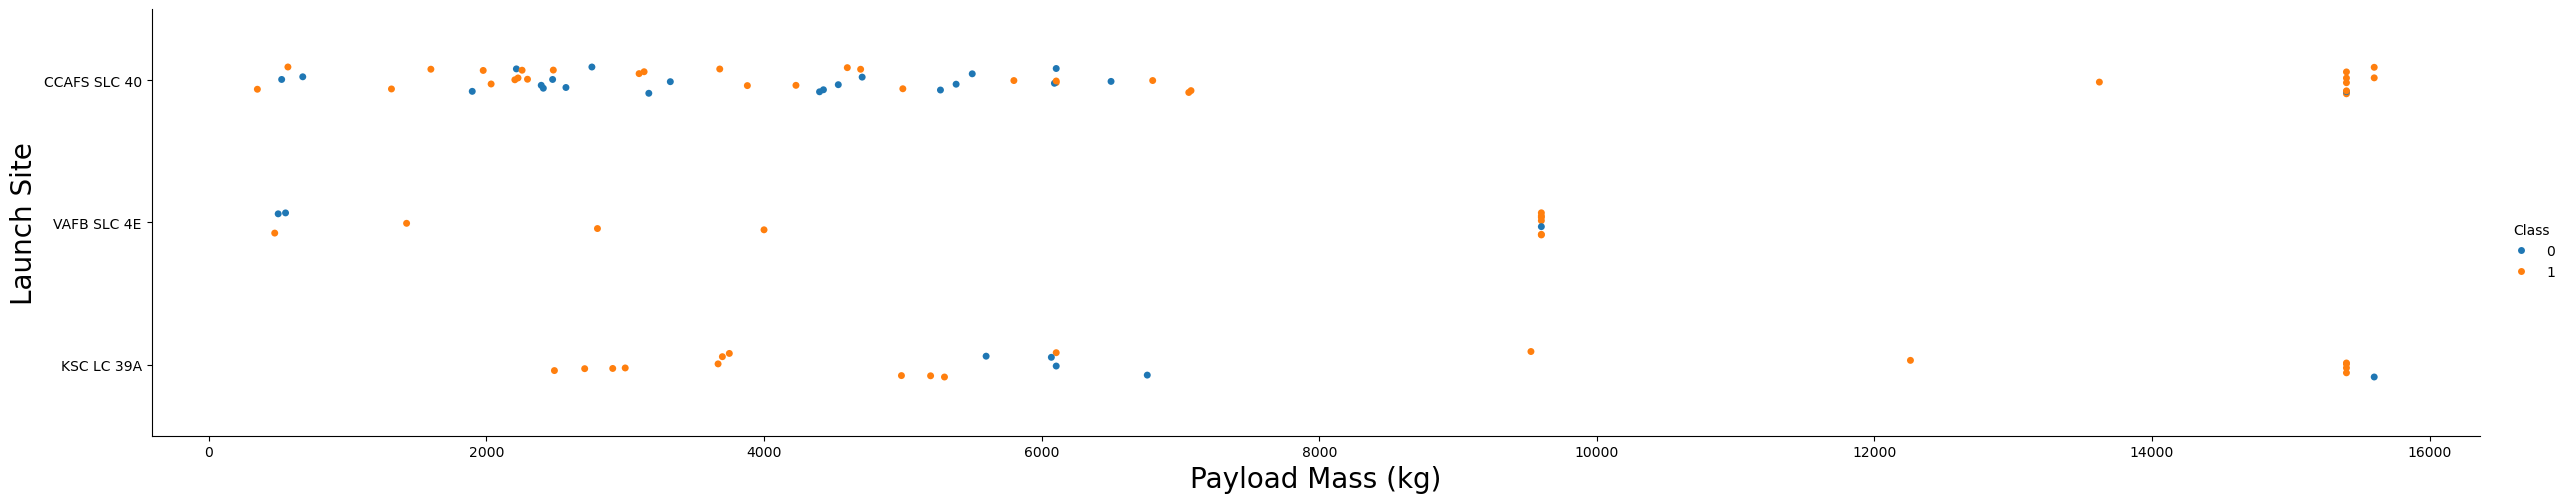

In [7]:
# Plot a scatter point chart with x axis to be Pay Load Mass (kg) and y axis to be the launch site, and hue to be the class value

# Scatter of payload mass vs. launch site, coloured by success/failure
sns.catplot(
    data=df,
    x="PayloadMass",
    y="LaunchSite",
    hue="Class",        # 1 = success, 0 = failure
    kind="strip",       # scatter points
    aspect=5,           # wide figure
    height=5
)

plt.xlabel("Payload Mass (kg)", fontsize=20)
plt.ylabel("Launch Site", fontsize=20)
plt.show()



/var/folders/zv/7cx8dlqd6bn1g5l_x436ytyjzcxln1/T/ipykernel_54913/104905331.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=orbit_success, x='Orbit', y='SuccessRate', palette='viridis')


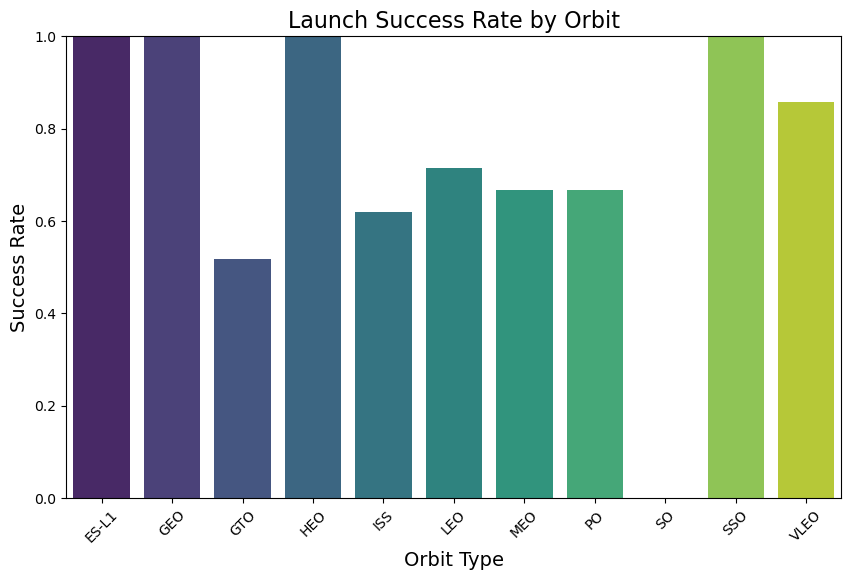

In [8]:
# ------------------------------------------------------------
# Success rate (mean of Class) for each orbit type
# ------------------------------------------------------------
orbit_success = (
    df.groupby('Orbit')['Class']
      .mean()                 # success rate per orbit
      .reset_index()
      .rename(columns={'Class': 'SuccessRate'})
)

# Bar chart
plt.figure(figsize=(10,6))
sns.barplot(data=orbit_success, x='Orbit', y='SuccessRate', palette='viridis')

plt.ylim(0, 1)
plt.ylabel('Success Rate', fontsize=14)
plt.xlabel('Orbit Type', fontsize=14)
plt.title('Launch Success Rate by Orbit', fontsize=16)
plt.xticks(rotation=45)
plt.show()


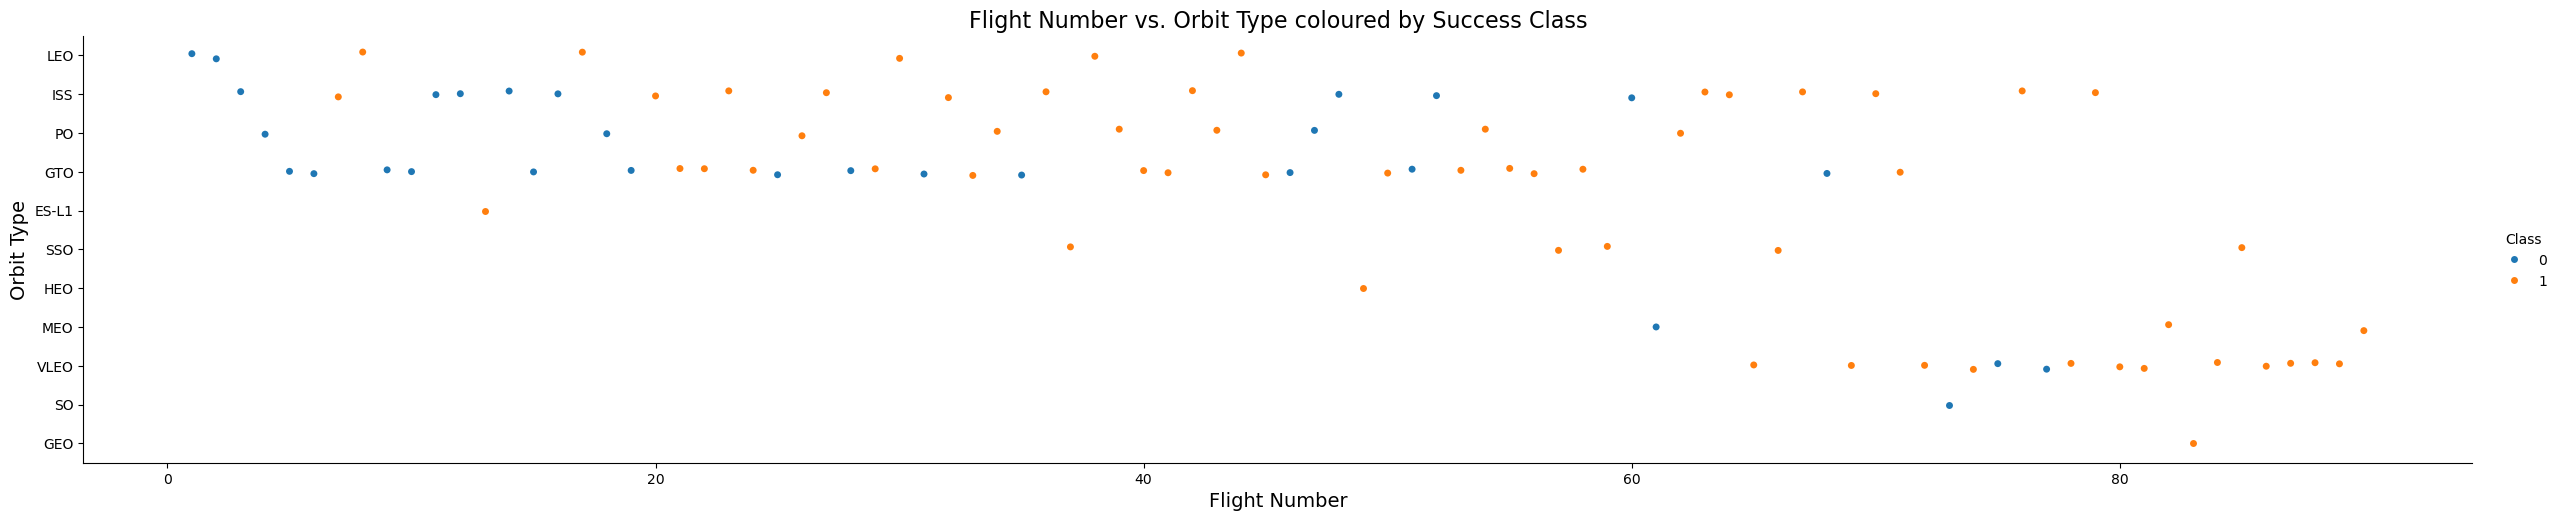

In [9]:
# Plot a scatter point chart with x axis to be FlightNumber and y axis to be the Orbit, and hue to be the class value

# Scatter of flight number vs orbit type, coloured by launch success
sns.catplot(
    data=df,
    x="FlightNumber",
    y="Orbit",
    hue="Class",       # 1 = success, 0 = failure
    kind="strip",      # scatter points on a categorical axis
    aspect=5,
    height=5
)

plt.xlabel("Flight Number", fontsize=14)
plt.ylabel("Orbit Type", fontsize=14)
plt.title("Flight Number vs. Orbit Type coloured by Success Class", fontsize=16)
plt.show()


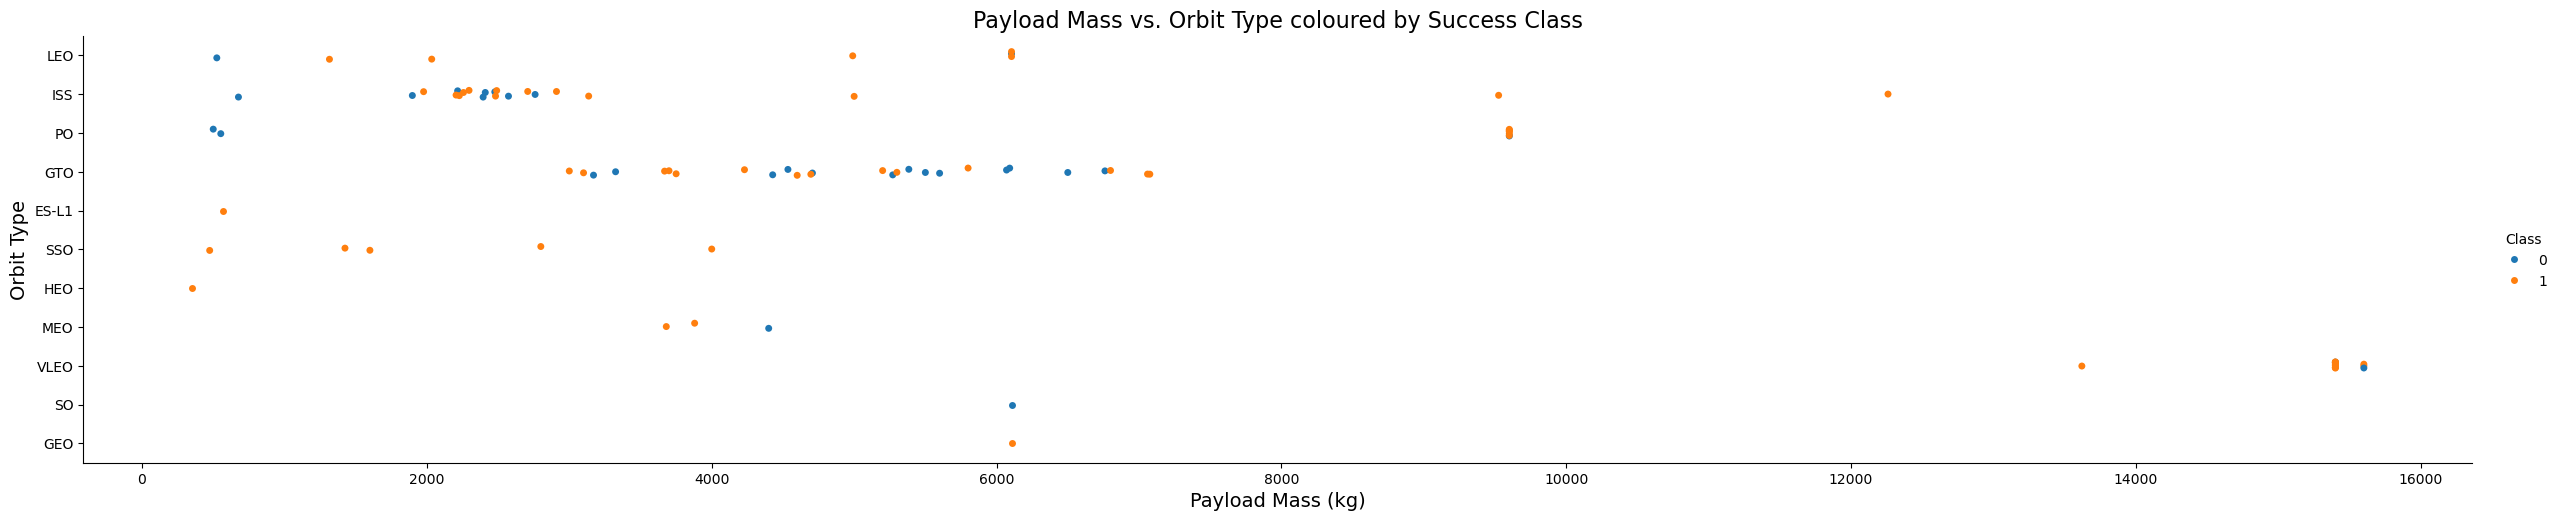

In [10]:
sns.catplot(
    data=df,
    x="PayloadMass",
    y="Orbit",
    hue="Class",      # 1 = success, 0 = failure
    kind="strip",     # scatter‑style plot
    aspect=5,
    height=5
)

plt.xlabel("Payload Mass (kg)", fontsize=14)
plt.ylabel("Orbit Type", fontsize=14)
plt.title("Payload Mass vs. Orbit Type coloured by Success Class", fontsize=16)
plt.show()


In [11]:
# A function to Extract years from the date 
year=[]
def Extract_year():
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year
Extract_year()
df['Date'] = year
df.head()
    

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


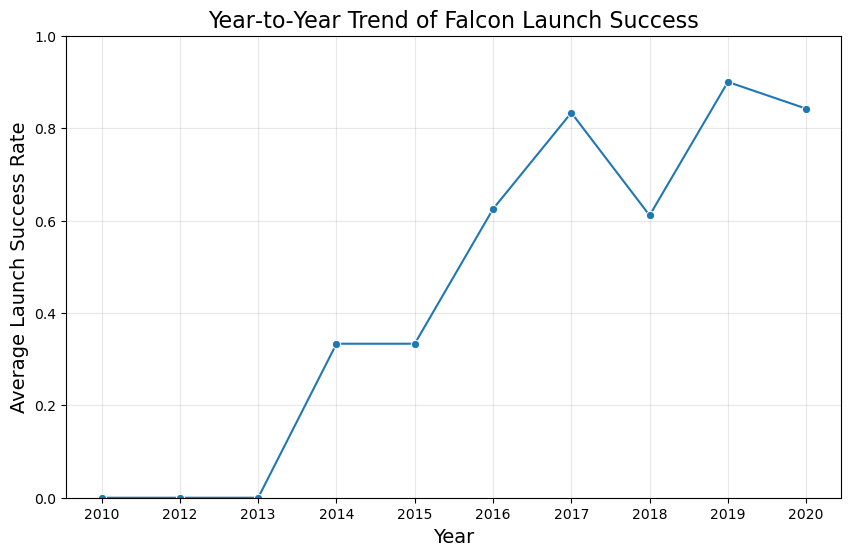

In [12]:
# Plot a line chart with x axis to be the extracted year and y axis to be the success rate

# ------------------------------------------------------------
# Compute yearly launch‑success rate
# ------------------------------------------------------------
df['Year'] = df['Date'].str[:4]          # ensure Year column exists
yearly_success = (
    df.groupby('Year')['Class']
      .mean()                            # mean of Class = success rate
      .reset_index()
      .rename(columns={'Class': 'SuccessRate'})
      .sort_values('Year')
)

# ------------------------------------------------------------
# Plot the trend
# ------------------------------------------------------------
plt.figure(figsize=(10,6))
sns.lineplot(data=yearly_success, x='Year', y='SuccessRate', marker='o')

plt.ylim(0, 1)
plt.ylabel('Average Launch Success Rate', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.title('Year‑to‑Year Trend of Falcon Launch Success', fontsize=16)
plt.grid(True, alpha=0.3)
plt.show()


In [13]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


In [14]:
# One‑hot encode the categorical columns
categorical_cols = ['Orbit', 'LaunchSite', 'LandingPad', 'Serial']

features_one_hot = pd.get_dummies(
    features,
    columns=categorical_cols,
    prefix=categorical_cols,      # keep column names readable
    prefix_sep='_',               # e.g. Orbit_GTO, LaunchSite_CCAFS LC‑40
    dtype=int                     # 0/1 integers
)

# inspect the result
features_one_hot.head()


,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,6104.959412,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,525.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,677.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,500.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,3170.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
# Cast every column in the one‑hot dataframe to float64
features_one_hot = features_one_hot.astype('float64')

# quick verification
print(features_one_hot.dtypes.head())   # first few dtypes should all show float64


FlightNumber    float64
PayloadMass     float64
Flights         float64
GridFins        float64
Reused          float64
dtype: object
